# Problem statement
Predict the genre of movie based on plot summary and other features

# Import libraries

In [ ]:
import pandas as pd
import numpy as np


# Load data

In [ ]:
df = pd.read_csv('/content/Movie_combined.csv')
df

,Unnamed: 0,Title,Genre,Plot,Poster
0,0,the great train robbery,action,The film opens with two bandits breaking into ...,https://m.media-amazon.com/images/M/MV5BOWE4M2...
1,1,the suburbanite,comedy,The film is about a family who move to the sub...,https://m.media-amazon.com/images/M/MV5BMTUwOT...
2,2,how brown saw the baseball game,comedy,Before heading out to a baseball game at a nea...,0
3,5,the adventures of dollie,drama,On a beautiful summer day a father and mother ...,https://m.media-amazon.com/images/M/MV5BMDlmYz...
4,6,the black viper,drama,A thug accosts a girl as she leaves her workpl...,https://m.media-amazon.com/images/M/MV5BZDVjYT...
...,...,...,...,...,...
17298,21223,selam,drama,The film opens with a Senegalese boy named Kha...,https://m.media-amazon.com/images/M/MV5BMzEyMz...
17299,21224,particle (film),drama,"Zeynep lost her job at weaving factory, and he...",NaN
17300,21225,çalgı çengi i̇kimiz,comedy,"Two musicians, Salih and Gürkan, described the...",https://m.media-amazon.com/images/M/MV5BNWM0N2...
17301,21226,olanlar oldu,comedy,"Zafer, a sailor living with his mother Döndü i...",https://m.media-amazon.com/images/M/MV5BYWViZj...


# **Data Preprocessing:**
Data preprocessing refers to the steps and techniques applied to raw data before it can be used for analysis or machine learning. It is a crucial step in the data science pipeline as the quality of the data directly influences the results of any analysis or model.

# EDA
It is a critical step in data analysis process that involves examining and visualizing datasets to understand their charcteristics patterns and relationships.
It involves three steps
1. Summarise data
2. Handling missing values
3. visualization and insights

**Statistical summary**
summarizing data involves generating descriptive statistics of the dataset. The goal is to understand the structure of the data before diving into more complex analyses or modeling

In [ ]:
df.shape

(17303, 5)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Title', 'Genre', 'Plot', 'Poster'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17303 entries, 0 to 17302
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  17303 non-null  int64 
 1   Title       17303 non-null  object
 2   Genre       17303 non-null  object
 3   Plot        17303 non-null  object
 4   Poster      16697 non-null  object
dtypes: int64(1), object(4)
memory usage: 676.0+ KB


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Title,17303,16620,prey,9
Genre,17303,6,drama,5793
Plot,17303,16584,"At night, a carnivorous, shape-shifting alien ...",9
Poster,16697,16016,0,523


In [ ]:
df.head()

,Unnamed: 0,Title,Genre,Plot,Poster
0,0,the great train robbery,action,The film opens with two bandits breaking into ...,https://m.media-amazon.com/images/M/MV5BOWE4M2...
1,1,the suburbanite,comedy,The film is about a family who move to the sub...,https://m.media-amazon.com/images/M/MV5BMTUwOT...
2,2,how brown saw the baseball game,comedy,Before heading out to a baseball game at a nea...,0
3,5,the adventures of dollie,drama,On a beautiful summer day a father and mother ...,https://m.media-amazon.com/images/M/MV5BMDlmYz...
4,6,the black viper,drama,A thug accosts a girl as she leaves her workpl...,https://m.media-amazon.com/images/M/MV5BZDVjYT...


In [ ]:
df.tail()

,Unnamed: 0,Title,Genre,Plot,Poster
17298,21223,selam,drama,The film opens with a Senegalese boy named Kha...,https://m.media-amazon.com/images/M/MV5BMzEyMz...
17299,21224,particle (film),drama,"Zeynep lost her job at weaving factory, and he...",NaN
17300,21225,çalgı çengi i̇kimiz,comedy,"Two musicians, Salih and Gürkan, described the...",https://m.media-amazon.com/images/M/MV5BNWM0N2...
17301,21226,olanlar oldu,comedy,"Zafer, a sailor living with his mother Döndü i...",https://m.media-amazon.com/images/M/MV5BYWViZj...
17302,21227,i̇stanbul kırmızısı,romance,The writer Orhan Şahin returns to İstanbul aft...,https://m.media-amazon.com/images/M/MV5BYzA0Yj...


In [ ]:
df.isnull().sum()

Unnamed: 0      0
Title           0
Genre           0
Plot            0
Poster        606
dtype: int64

# Considering relavent features

In [ ]:
X=df['Plot']
X

0        The film opens with two bandits breaking into ...
1        The film is about a family who move to the sub...
2        Before heading out to a baseball game at a nea...
3        On a beautiful summer day a father and mother ...
4        A thug accosts a girl as she leaves her workpl...
                               ...                        
17298    The film opens with a Senegalese boy named Kha...
17299    Zeynep lost her job at weaving factory, and he...
17300    Two musicians, Salih and Gürkan, described the...
17301    Zafer, a sailor living with his mother Döndü i...
17302    The writer Orhan Şahin returns to İstanbul aft...
Name: Plot, Length: 17303, dtype: object

In [ ]:
y=df['Genre']
y

0         action
1         comedy
2         comedy
3          drama
4          drama
          ...   
17298      drama
17299      drama
17300     comedy
17301     comedy
17302    romance
Name: Genre, Length: 17303, dtype: object

In [ ]:
genre_count=y.value_counts()
genre_count

drama        5793
comedy       4267
action       3611
thriller     2107
romance       923
animation     602
Name: Genre, dtype: int64

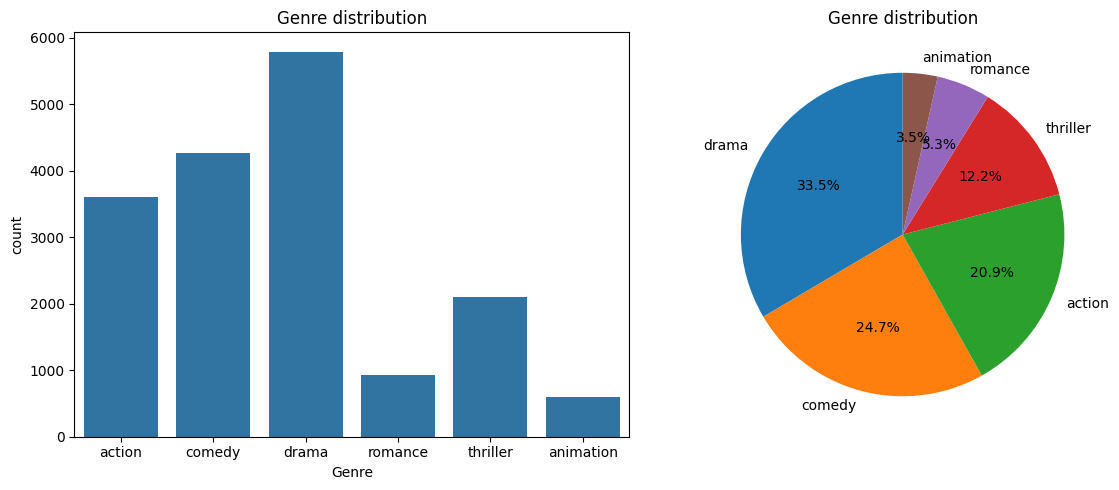

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot count plot
sns.countplot(x='Genre', data=df, ax=axes[0])
axes[0].set_title("Genre distribution")

# Plot pie chart
sentiment_counts = df['Genre'].value_counts()
axes[1].pie(genre_count, labels=genre_count.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Genre distribution")

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

# Text data preprocessing
# **Data Cleaning:**
Data cleaning is an essential step, it involves various processes to handle noise, inconsistencies, and irrelevant information in the text, ensuring that the data is suitable for analysis.Different steps involved in data cleaning are
* Lowercasing
* Removing Special Characters and Punctuation
* Removing white space
* Removeing numerical values
* Tokenization
* Handling negation words
* Removing stop words


# **Pipeline**
A pipeline is a way to streamline a lot of the routine processes, making it easier to keep your code organized and reducing the risk of errors. A pipeline bundles together a sequence of data processing steps.

In [ ]:
import re
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def process_text(text):
    if isinstance(text, str):
        # Lowercasing
        text = text.lower()
        # Removing special characters and punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove URLs
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        # Remove numerical values
        text = re.sub(r'\d+', '', text)
        # Tokenization using NLTK
        text = word_tokenize(text)
        # Negation handling
        text = ['not_' + word if text[i - 1] == 'not' else word for i, word in enumerate(text)]
        # Remove stop words using NLTK and sklearn combined
        text = [word for word in text if word not in ENGLISH_STOP_WORDS and word not in stopwords.words('english')]
        # Lemmatization using NLTK
        lemmatizer = WordNetLemmatizer()
        text = [lemmatizer.lemmatize(word) for word in text]
        return text
    else:
        return []

preprocessor = Pipeline([
    ('text_processing', FunctionTransformer(lambda x: x.apply(lambda text: process_text(text))))
])

df['Plot'] = preprocessor.fit_transform(df['Plot'])
df['Plot']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0        [film, open, bandit, breaking, railroad, teleg...
1        [film, family, suburb, hoping, quiet, life, th...
2        [heading, baseball, game, nearby, ballpark, sp...
3        [beautiful, summer, day, father, mother, daugh...
4        [thug, accosts, girl, leaf, workplace, man, re...
                               ...                        
17298    [film, open, senegalese, boy, named, khadim, t...
17299    [zeynep, lost, job, weaving, factory, family, ...
17300    [musician, salih, gürkan, described, adventure...
17301    [zafer, sailor, living, mother, döndü, coastal...
17302    [writer, orhan, şahin, return, i̇stanbul, year...
Name: Plot, Length: 17303, dtype: object

# **Text Transformation**
The goal of text transformation is to represent textual information in a structured and numerical way that can be effectively used for machine learning or natural language processing (NLP) tasks.

# **TF-IDF:** Term Frequency-Inverse Document Frequency
* It is a numerical statistic that reflects the importance of a term in a document relative to a collection of documents (corpus).
* TF-IDF is commonly used to evaluate the significance of words in a document within a larger collection of documents.
* The TF-IDF score is calculated based on two components: Term Frequency (TF) and Inverse Document Frequency (IDF).
    * Term Frequency measures how often a term appears in a document.
    * Inverse Document Frequency measures how unique or rare a term is across the entire corpus. Terms that appear in many documents have lower IDF scores, while terms that appear in fewer documents have higher IDF scores.
    * The TF-IDF score for a term t in a document d is obtained by multiplying the TF and IDF values:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'Plot' is a list of preprocessed tokens
df['Plot'] = df['Plot'].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else tokens)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()  # You can adjust max_features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Plot'])

# Print the TF-IDF matrix or use it for further analysis
tfidf_matrix

<17303x104784 sparse matrix of type '<class 'numpy.float64'>'
	with 2318638 stored elements in Compressed Sparse Row format>

# Model training

# Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
It involves selecting the best set of hyperparameters for a model to achieve optimal performance. Hyperparameters are configuration settings that are not learned from the data but are set prior to the training process. The process of hyperparameter tuning aims to find the combination of hyperparameters that results in the best model performance.

Types:

**Grid Search:**

In grid search, a predefined set of hyperparameter values is specified, and the algorithm evaluates the model performance for all possible combinations of these values.
It is an exhaustive search approach, and while it ensures that no combination is missed, it can be computationally expensive.

**Random Search:**

Random search randomly samples hyperparameter combinations from a defined search space.
It is less computationally intensive compared to grid search and can be more effective in finding good hyperparameter values.

# Cross-validation
It is a resampling technique used in machine learning to assess the performance of a model and to reduce the risk of overfitting. It involves dividing the dataset into multiple subsets, training the model on some of these subsets, and evaluating its performance on the remaining subsets. The primary goal is to ensure that the model generalizes well to unseen data.

# 1)Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
baselineModel = LogisticRegression(max_iter=1000)

# Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1],
    'penalty': ['l2']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(baselineModel, param_grid, cv=3)
baselineModel = grid_search.fit(X_train, y_train)

print('best hyperparameters: ', grid_search.best_estimator_)

# Predict on the test set
y_pred = baselineModel.predict(X_test)

# Evaluate the model using confusion matrix and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:\n", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

best hyperparameters:  LogisticRegression(C=1, max_iter=1000)
Accuracy:
 0.6495232591736493
Confusion Matrix:
 [[534   0  36 146   5  24]
 [ 26  35  28  13   0   2]
 [ 45   0 548 256   4  17]
 [ 86   0 134 898   7   9]
 [  9   0  23 113  26   1]
 [ 51   0  39 137   2 207]]
Classification Report:
               precision    recall  f1-score   support

      action       0.71      0.72      0.71       745
   animation       1.00      0.34      0.50       104
      comedy       0.68      0.63      0.65       870
       drama       0.57      0.79      0.67      1134
     romance       0.59      0.15      0.24       172
    thriller       0.80      0.47      0.59       436

    accuracy                           0.65      3461
   macro avg       0.73      0.52      0.56      3461
weighted avg       0.67      0.65      0.64      3461



# 2)MultinomialNB model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Define MultinomialNB model
naiveBayes_model = MultinomialNB()

# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.1, 1.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(naiveBayes_model, param_grid, cv=3)
naiveBayes_model = grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Predict on the test set
y_pred = naiveBayes_model.predict(X_test)

# Evaluate the model using confusion matrix and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:\n", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Best hyperparameters: {'alpha': 0.1}
Accuracy:
 0.61022825772898
Confusion Matrix:
 [[488   1  38 206   2  10]
 [ 26  29  32  14   0   3]
 [ 38   0 507 312   7   6]
 [ 77   0 120 932   2   3]
 [  9   0  17 131  15   0]
 [ 50   0  40 205   0 141]]
Classification Report:
               precision    recall  f1-score   support

      action       0.71      0.66      0.68       745
   animation       0.97      0.28      0.43       104
      comedy       0.67      0.58      0.62       870
       drama       0.52      0.82      0.64      1134
     romance       0.58      0.09      0.15       172
    thriller       0.87      0.32      0.47       436

    accuracy                           0.61      3461
   macro avg       0.72      0.46      0.50      3461
weighted avg       0.66      0.61      0.59      3461



# 3)CART model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Decision Tree Classifier
cart_model = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_dist = {'max_depth': [5, 7, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2]}

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(cart_model, param_distributions=param_dist, cv=3)
cart_model_tuned = random_search.fit(X_train, y_train)

print('Best hyperparameters: ', random_search.best_estimator_)

# Make predictions on the test set
y_pred = cart_model_tuned.predict(X_test)

# Evaluate the model

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Best hyperparameters:  DecisionTreeClassifier(min_samples_split=10)
Accuracy: 0.61022825772898
Confusion Matrix:
 [[320  15  91 211  16  92]
 [ 17  41  15  23   0   8]
 [ 92  22 356 329  35  36]
 [170  13 271 544  56  80]
 [ 20   2  37  70  40   3]
 [ 92  10  66 112   8 148]]
Classification Report:
               precision    recall  f1-score   support

      action       0.45      0.43      0.44       745
   animation       0.40      0.39      0.40       104
      comedy       0.43      0.41      0.42       870
       drama       0.42      0.48      0.45      1134
     romance       0.26      0.23      0.24       172
    thriller       0.40      0.34      0.37       436

    accuracy                           0.42      3461
   macro avg       0.39      0.38      0.39      3461
weighted avg       0.42      0.42      0.42      3461

